In [332]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [333]:
data = pd.read_csv("./apples_pears.csv")

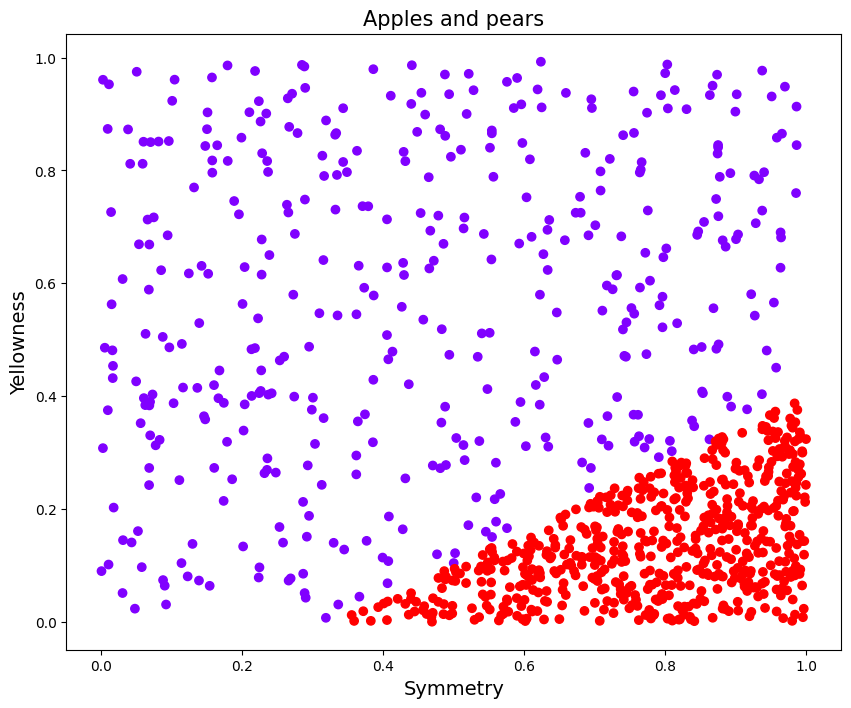

In [334]:
plt.figure(figsize=(10, 8))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=data['target'], cmap='rainbow')
plt.title('Apples and pears', fontsize=15)
plt.xlabel('Symmetry', fontsize=14)
plt.ylabel('Yellowness', fontsize=14)
plt.show()

In [335]:
X = data.iloc[:,:2].values
y = data['target'].values.reshape((-1, 1))

In [336]:
import torch
from torch.nn import Linear, Sigmoid

In [337]:
neuron = torch.nn.Sequential(Linear(X.shape[1], out_features=1), Sigmoid())

In [338]:
neuron(torch.autograd.Variable(torch.FloatTensor([1, 1])))

tensor([0.2725], grad_fn=<SigmoidBackward0>)

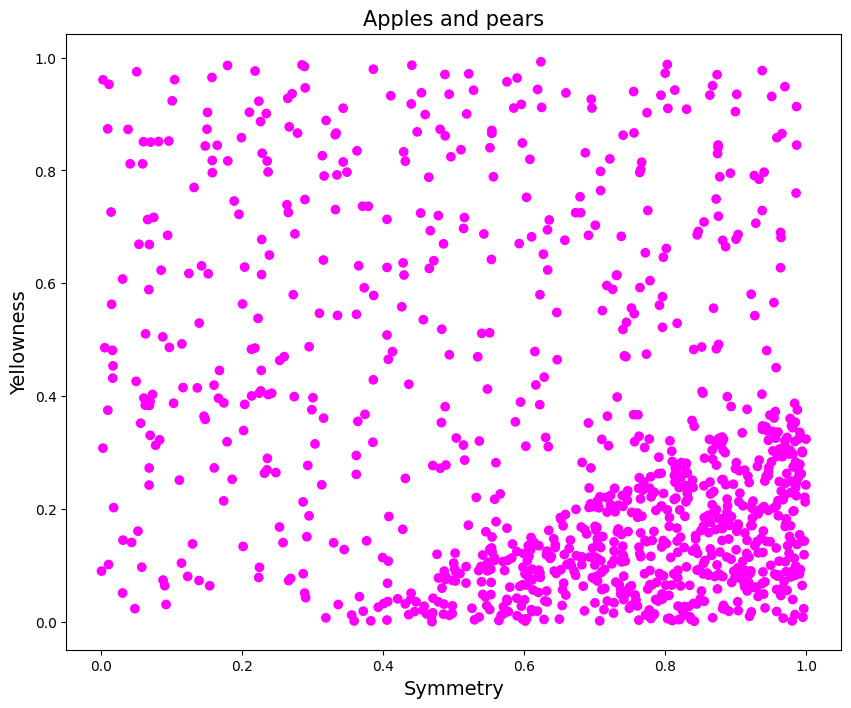

In [339]:
test_pred = neuron(torch.autograd.Variable(torch.FloatTensor(X)))

y_pred = test_pred > 0.5
y_pred = y_pred.data.numpy().reshape(-1)

plt.figure(figsize=(10, 8))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=y_pred, cmap='spring')
plt.title('Apples and pears', fontsize=15)
plt.xlabel('Symmetry', fontsize=14)
plt.ylabel('Yellowness', fontsize=14)
plt.show()

In [340]:
X = torch.autograd.Variable(torch.FloatTensor(X))
y = torch.autograd.Variable(torch.FloatTensor(y))

loss_fn = torch.nn.MSELoss(reduction='none')
learning_rate = 0.001
optimizer = torch.optim.SGD(neuron.parameters(), lr=learning_rate)
for t in range(500):
    y_pred = neuron(X)
    loss = loss_fn(y_pred, y)
    print('{} {}'.format(t, loss.data))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

0 tensor([[0.4182],
        [0.3902],
        [0.4470],
        [0.1887],
        [0.4086],
        [0.3953],
        [0.4228],
        [0.4229],
        [0.1362],
        [0.1219],
        [0.3905],
        [0.3958],
        [0.3648],
        [0.4086],
        [0.3633],
        [0.4130],
        [0.4347],
        [0.4225],
        [0.4034],
        [0.4072],
        [0.1616],
        [0.1020],
        [0.4471],
        [0.4417],
        [0.3919],
        [0.4111],
        [0.1328],
        [0.3820],
        [0.1861],
        [0.1487],
        [0.3750],
        [0.4298],
        [0.1118],
        [0.3760],
        [0.4179],
        [0.4020],
        [0.3878],
        [0.4095],
        [0.4353],
        [0.1008],
        [0.3990],
        [0.4492],
        [0.1126],
        [0.4347],
        [0.1201],
        [0.0950],
        [0.3848],
        [0.4021],
        [0.4129],
        [0.4250],
        [0.4138],
        [0.4192],
        [0.0896],
        [0.1069],
        [0.4161],
        

RuntimeError: grad can be implicitly created only for scalar outputs

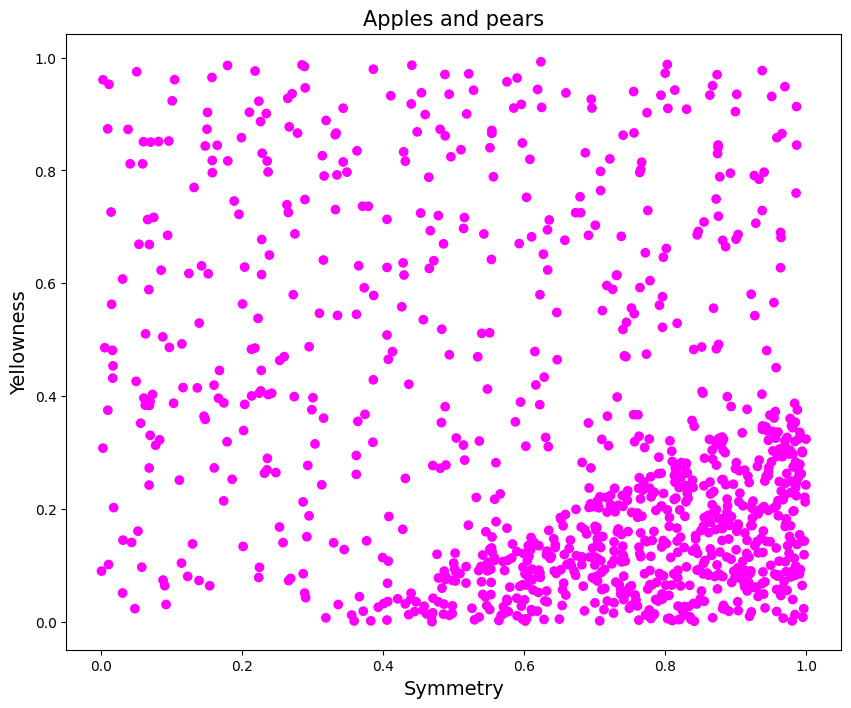

In [341]:
test_pred = neuron(X)

y_pred = test_pred > 0.5
y_pred = y_pred.data.numpy().reshape(-1)

plt.figure(figsize=(10, 8))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=y_pred, cmap='spring')
plt.title('Apples and pears', fontsize=15)
plt.xlabel('Symmetry', fontsize=14)
plt.ylabel('Yellowness', fontsize=14)
plt.show()

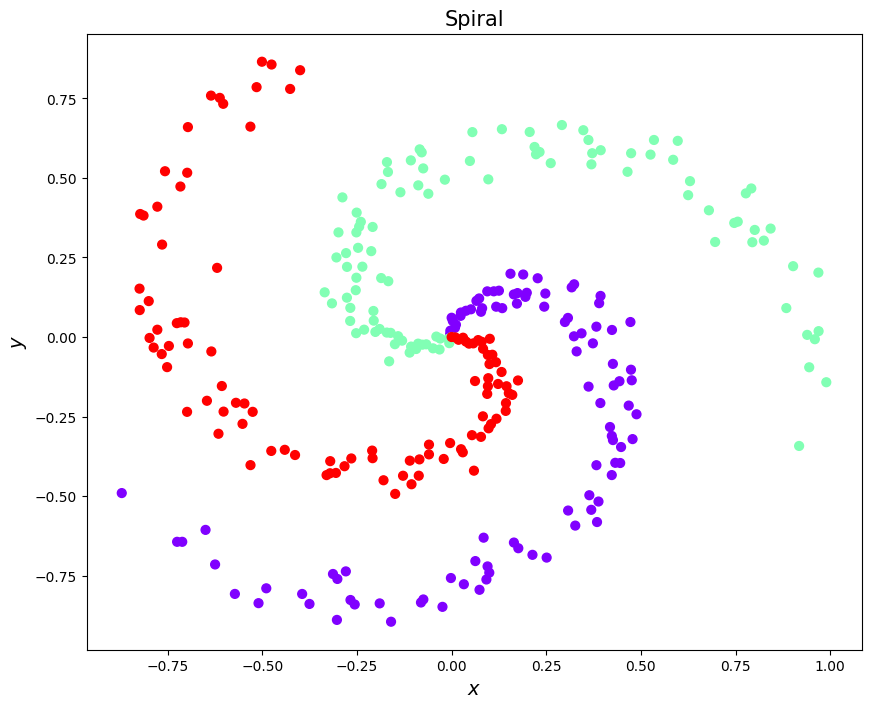

In [342]:
N = 100
D = 2
K = 3

X = np.zeros((N * K, D))
y = np.zeros(N * K, dtype='uint8')

for j in range(K):
    ix = range(N * j, N * (j + 1))
    r = np.linspace(0.0, 1, N)
    t = np.linspace(j * 4, (j + 1) * 4, N) + np.random.randn(N) * 0.2
    X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
    y[ix] = j

plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.rainbow)
plt.title('Spiral', fontsize=15)
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.show()

In [343]:
X = torch.autograd.Variable(torch.FloatTensor(X))
y = torch.autograd.Variable(torch.LongTensor(y.astype(np.int64)))

print(X.shape, y.shape)

torch.Size([300, 2]) torch.Size([300])


In [344]:
N = 64
D_in = 2
D_out = 3
neuron = torch.nn.Sequential(torch.nn.Linear(D_in, D_out),)
loss_fn = torch.nn.CrossEntropyLoss(size_average='False')
learning_rate = 0.9
optimizer = torch.optim.SGD(neuron.parameters(), lr=learning_rate)

for t in range(500):
    y_pred = neuron(X)
    loss = loss_fn(y_pred, y)
    print('{} {}'.format(t, loss.data))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

0 1.2445194721221924
1 1.1691011190414429
2 1.1194982528686523
3 1.0833865404129028
4 1.05476713180542
5 1.0307236909866333
6 1.0097851753234863
7 0.9911638498306274
8 0.9744015336036682
9 0.9592044353485107
10 0.9453641772270203
11 0.9327208399772644
12 0.9211434125900269
13 0.9105207324028015
14 0.900756299495697
15 0.8917654156684875
16 0.8834726810455322
17 0.8758118748664856
18 0.8687232732772827
19 0.862153947353363
20 0.8560566306114197
21 0.8503888845443726
22 0.8451130986213684
23 0.8401955366134644
24 0.8356052041053772
25 0.8313152194023132
26 0.827300488948822
27 0.8235390782356262
28 0.8200109004974365
29 0.8166975378990173
30 0.8135826587677002
31 0.8106516003608704
32 0.8078902959823608
33 0.805286705493927
34 0.8028293251991272
35 0.8005080223083496
36 0.7983130812644958
37 0.7962362170219421
38 0.7942693829536438
39 0.7924052476882935
40 0.7906370759010315
41 0.7889589667320251
42 0.7873648405075073
43 0.7858498096466064
44 0.7844087481498718
45 0.7830374240875244
46 0

C:\Users\artem\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\nn\_reduction.py:51: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


In [345]:
X = X.data.numpy()
y = y.data.numpy()

h = 0.02

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

grid_tensor = torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()])

Z = neuron(torch.autograd.Variable(grid_tensor))
Z = Z.data.numpy()
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)

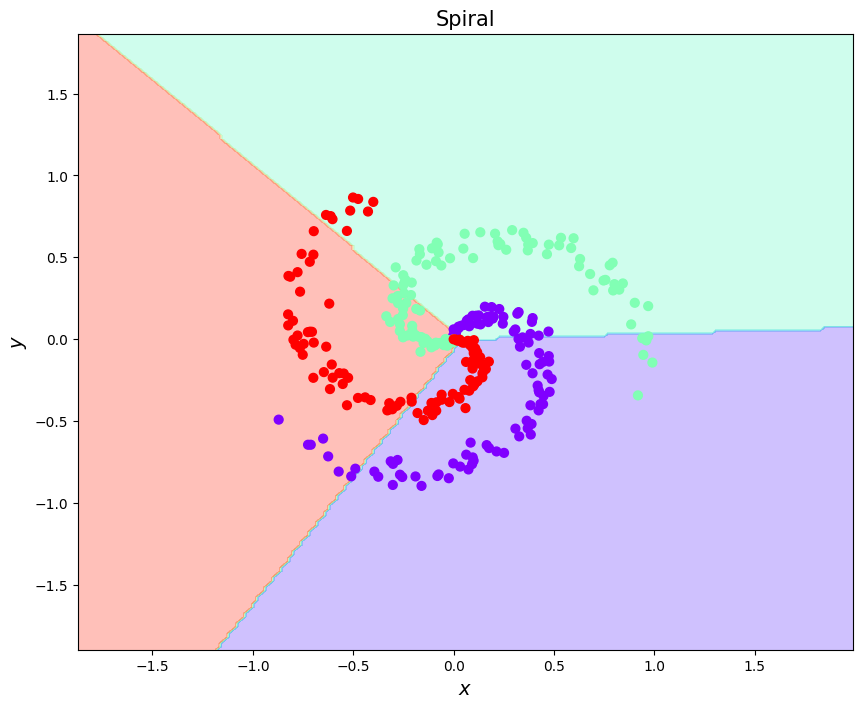

In [347]:
plt.figure(figsize=(10, 8))

plt.contourf(xx, yy, Z, cmap=plt.cm.rainbow, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.rainbow)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.title('Spiral', fontsize=15)
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.show()